In [1]:
#이상치 탐색

In [2]:
# 통계적기법> ESD
# 필요한 코드 인포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

#Jupter notebook 내에서 실행될 수 있도록 inline 처리
%matplotlib inline

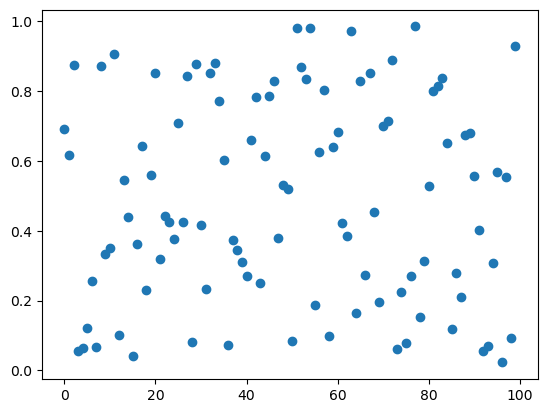

In [3]:
#임의의 데이터 생성
y = np.random.random(100)
x = np.arange(len(y))

#산점도
plt.scatter(x,y)

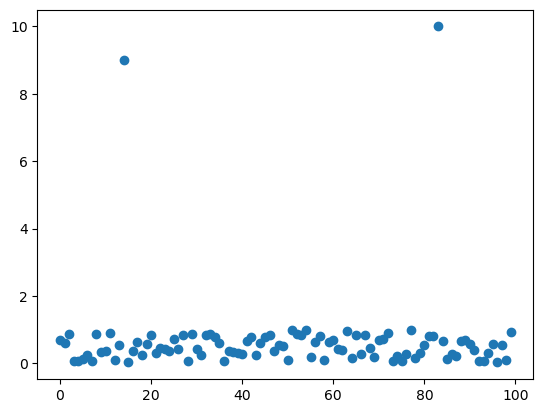

In [4]:
#이상치 추가 후 산점도
y[14] = 9
y[83] = 10

plt.scatter(x,y)

In [5]:
#Grubb's test
def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations/ std_dev
    print("Grubbs Statistics Value : {}".format(Gcal))
    return Gcal, max_ind

#임계치를 구하는 함수
def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

#임계치와 검정통계량의 비교
def check_G_values(Gs, Gc, inp, max_index):
    if Gs > Gc:
        print('{} is an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))
    else:
        print('{} is not an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))

In [6]:
#Generalized ESD test
def ESD_Test(input_series, alpha, max_outliers):
    for iterations in range(max_outliers):
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        check_G_values(Gstat, Gcritical, input_series, max_index)
        input_series = np.delete(input_series, max_index)

In [7]:
#유의수준 0.05에서의 r을 3으로 설정
ESD_Test(y, 0.05, 3)

Grubbs Critical Value: 3.384082902288351
Grubbs Statistics Value : 7.19999434615126
10.0 is an outlier. G > G-critical: 7.2000 > 3.3841 

Grubbs Critical Value: 3.380650508067058
Grubbs Statistics Value : 9.372479264166955
9.0 is an outlier. G > G-critical: 9.3725 > 3.3807 

Grubbs Critical Value: 3.377175980782947
Grubbs Statistics Value : 1.7163461987408863
0.9845820851988205 is not an outlier. G > G-critical: 1.7163 > 3.3772 



# 
'이상치로 설정한 값들은 이상치라고 하며, 아닌 값은 아니다'라는 출력을 얻었다.



In [8]:
# 통계적기법> Z-score
import numpy as np  

#평균과 표준편차 계산
data = [1, 3, 3, 2, 4, 1, 1, 12, 1, 2, 3, 2, 1, 2, 1]

mean = np.mean(data)

std = np.std(data)

print('데이터의 평균은', mean)

print('데이터의 표준 편차는', std)

데이터의 평균은 2.6
데이터의 표준 편차는 2.6783079235467557


In [9]:
#Z-score 계산하기(Z-score가 3(임계값)보다 크면 이상값으로 출력)
threshold = 3

outlier = [] 

for i in data: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 

print('데이터셋 내의 이상값은', outlier) 

데이터셋 내의 이상값은 [12]
